In [1]:
# <<<必要なライブラリーなどを追加>>>
import csv
import pprint
import numpy as np
import struct
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os
import tkinter
import tkinter.filedialog
import tkinter.messagebox
import sys
from PIL import Image, ImageDraw
from itertools import permutations, combinations

In [2]:
# <<<解析に用いる.datファイルを読み込む>>>

# tkinterというGUIを用いて読み込みたいファイルを選択してもらう
root = tkinter.Tk()
root.withdraw()
fTyp = [("","txt")]
iDir = os.path.abspath(os.path.dirname('__file__'))
tkinter.messagebox.showinfo('CRISM_Analysis_Tool','解析したい.txtファイルを選択してください！')
datafile = tkinter.filedialog.askopenfilename(filetypes = fTyp,initialdir = iDir)

# .datデータの読み込み
print("txtファイル読み込み完了")

txtファイル読み込み完了


In [3]:
# ファイルのデータを配列に分けて格納する

with open(datafile,"r") as f:
    datalist = f.readlines()
    
New_datalist = []
New_datalist2 = []
num = 0

for i in datalist:
    num+=1
    data = " ".join(i.split())
    New_datalist.append(data)

for k in New_datalist:
    data = k.split(" ")
    New_datalist2.append(data)

pointX = [0] * num
pointY = [0] * num
    
for i in range(3,num):
    pointX[i] = float(New_datalist2[i][0])
    pointY[i] = float(New_datalist2[i][1])

In [4]:
during_point = 1
num2 = 0
count = 0
Ave_sum = 0.0
Smozed_dataY = np.zeros(433)
Smozed_dataX = np.zeros(433)

for i in range(5,num-2):
    for j in range(1,during_point+1):
        Ave_sum += pointY[i+j]
        Ave_sum += pointY[i-j] 
    Ave_sum += pointY[i]
    Smozed_dataY[i-5] = Ave_sum / ((during_point * 4) + 1)
    Smozed_dataX[i-5] = pointX[i-2] 
    Ave_sum = 0.0
    num2+=1

In [5]:
point_1 = 0.0
point_2 = 0.0
point_3 = 0.0
iden_pointY = [0]
iden_pointX = [0]
count = 0

for i in range(num2):
    if Smozed_dataY[i] - Smozed_dataY[i+1] <= 0.01:
        point_1 = Smozed_dataY[i+1]
        if Smozed_dataY[i+1] - Smozed_dataY[i+2] >= 0.01:
            point_2 = Smozed_dataY[i+2]
            if Smozed_dataY[i+2] - Smozed_dataY[i+3] <= 0.01:
                point_3 = Smozed_dataY[i+3]
                if point_1 - point_2 >= 0.01 and point_3 - point_2 >= 0.01:
                    iden_pointY.append(point_2)
                    iden_pointX.append(Smozed_dataX[i-2])
                    count += 1
        
    elif Smozed_dataY[i] - Smozed_dataY[i+1] >= 0.01:
        point_1 = Smozed_dataY[i]
        point_2 = Smozed_dataY[i+1]
        if Smozed_dataY[i+1] - Smozed_dataY[i+2] <= 0.01:
            point_3 = Smozed_dataY[i+2]
            if point_1 - point_2 >= 0.01 and point_3 - point_2 >= 0.01:
                    iden_pointY.append(point_2)
                    iden_pointX.append(Smozed_dataX[i-2])
                    count += 1
                    
    else:
        continue

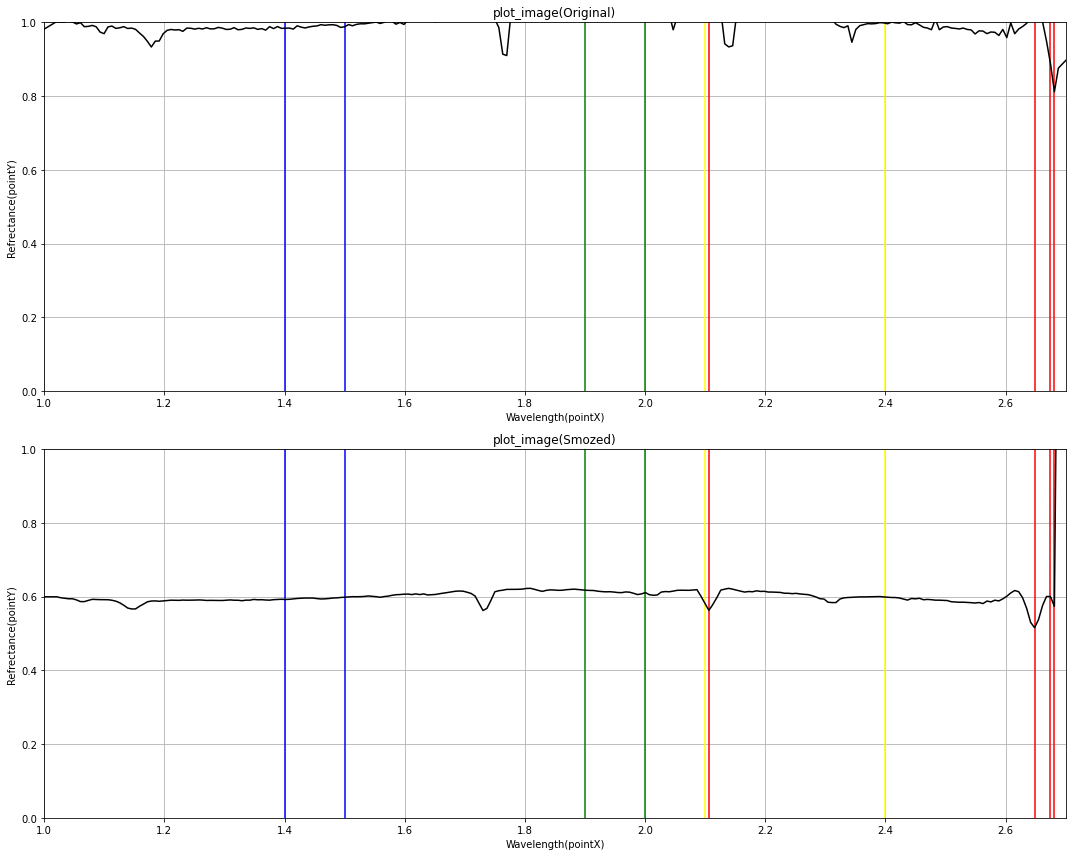

In [6]:
  fig = plt.figure(figsize=[15,12])
    
  ax1 = fig.add_subplot(2, 1, 1)
  ax1.plot(pointX,pointY,color = 'black')
  plt.vlines(iden_pointX, -2, 4, color = 'red')
  plt.vlines(1.4, -2, 4, colors = 'blue')
  plt.vlines(1.5, -2, 4, colors = 'blue')
  plt.vlines(1.9, -2, 4, colors = 'green')
  plt.vlines(2.0, -2, 4, colors = 'green')
  plt.vlines(2.1, -2, 4, colors = 'yellow')
  plt.vlines(2.4, -2, 4, colors = 'yellow')
  ax1.grid()
  ax1.set_xlim(1,2.7)
  ax1.set_ylim(0, 1)
  ax1.set_title("plot_image(Original)")
  ax1.set_xlabel("Wavelength(pointX)")
  ax1.set_ylabel("Refrectance(pointY)")

  ax2 = fig.add_subplot(2, 1, 2)
  ax2.plot(pointX,Smozed_dataY,color = 'black')
  plt.vlines(iden_pointX, -2, 4, color = 'red')
  plt.vlines(1.4, -2, 4, colors = 'blue')
  plt.vlines(1.5, -2, 4, colors = 'blue')
  plt.vlines(1.9, -2, 4, colors = 'green')
  plt.vlines(2.0, -2, 4, colors = 'green')
  plt.vlines(2.1, -2, 4, colors = 'yellow')
  plt.vlines(2.4, -2, 4, colors = 'yellow')
  ax2.grid()
  ax2.set_xlim(1,2.7)
  ax2.set_ylim(0, 1)
  ax2.set_title("plot_image(Smozed)")
  ax2.set_xlabel("Wavelength(pointX)")
  ax2.set_ylabel("Refrectance(pointY)")

  plt.tight_layout()
  plt.show()

---------------------------------------------------------------
Originalデータの範囲を調整したい場合はこちらに入力
Y軸の最大値を入力
 >>>  1.1
Y軸の最小値を入力
 >>>  0.9
---------------------------------------------------------------
---------------------------------------------------------------
Smozedデータの範囲を調整したい場合はこちらに入力
Y軸の最大値を入力
 >>>  0.7
Y軸の最小値を入力
 >>>  0.5
---------------------------------------------------------------


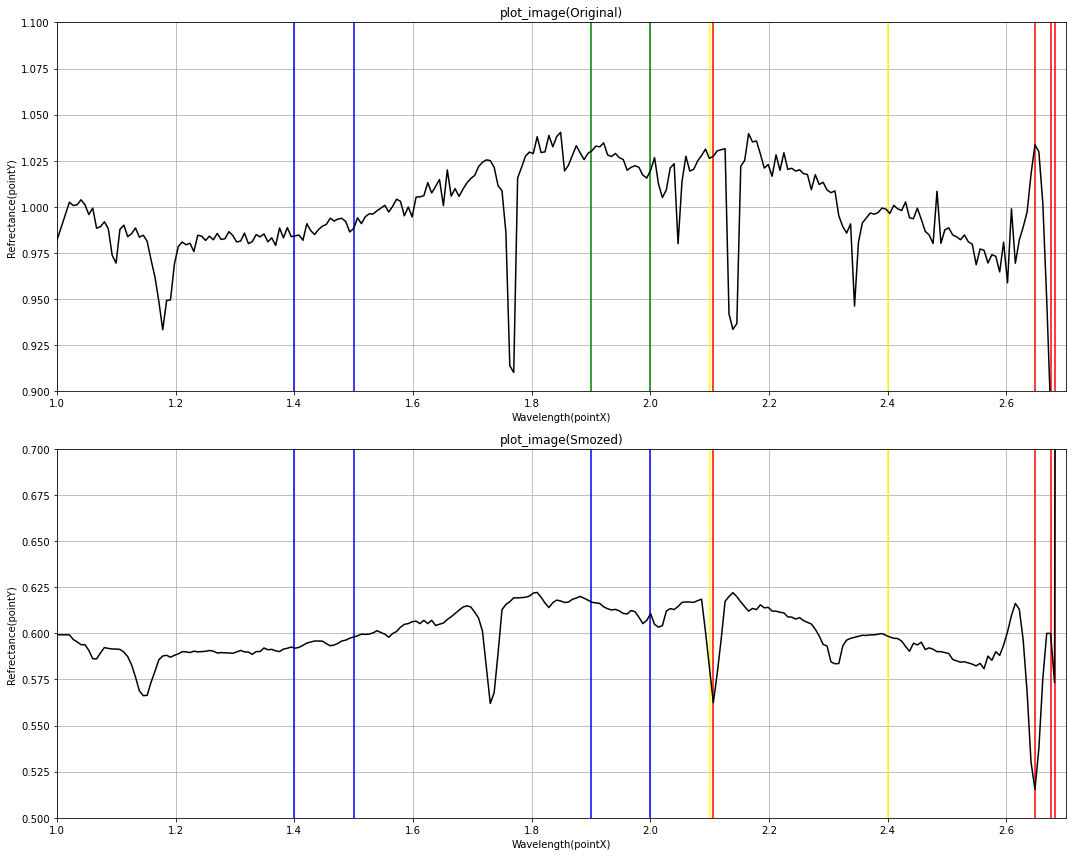

In [7]:
Ori_Y_Max = 0.0
Ori_Y_Min = 0.0
Smo_Y_Max = 0.0
smo_Y_Min = 0.0

print("---------------------------------------------------------------")
print("Originalデータの範囲を調整したい場合はこちらに入力")
print("Y軸の最大値を入力")
Ori_Y_Max = float(input(' >>>  '))
print("Y軸の最小値を入力")
Ori_Y_Min = float(input(' >>>  '))
print("---------------------------------------------------------------") 
    
print("---------------------------------------------------------------")
print("Smozedデータの範囲を調整したい場合はこちらに入力")
print("Y軸の最大値を入力")
Smo_Y_Max = float(input(' >>>  '))
print("Y軸の最小値を入力")
smo_Y_Min = float(input(' >>>  '))
print("---------------------------------------------------------------")

fig = plt.figure(figsize=[15,12])
    
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(pointX,pointY,color = 'black')
plt.vlines(iden_pointX, -2, 4, color = 'red')
plt.vlines(1.4, -2, 4, colors = 'blue')
plt.vlines(1.5, -2, 4, colors = 'blue')
plt.vlines(1.9, -2, 4, colors = 'green')
plt.vlines(2.0, -2, 4, colors = 'green')
plt.vlines(2.1, -2, 4, colors = 'yellow')
plt.vlines(2.4, -2, 4, colors = 'yellow')
ax1.grid()
ax1.set_xlim(1,2.7)
ax1.set_ylim(Ori_Y_Min, Ori_Y_Max)
ax1.set_title("plot_image(Original)")
ax1.set_xlabel("Wavelength(pointX)")
ax1.set_ylabel("Refrectance(pointY)")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(pointX,Smozed_dataY,color = 'black')
plt.vlines(iden_pointX, -2, 4, color = 'red')
plt.vlines(1.4, -2, 4, colors = 'blue')
plt.vlines(1.5, -2, 4, colors = 'blue')
plt.vlines(1.9, -2, 4, colors = 'blue')
plt.vlines(2.0, -2, 4, colors = 'blue')
plt.vlines(2.1, -2, 4, colors = 'yellow')
plt.vlines(2.4, -2, 4, colors = 'yellow')
ax2.grid()
ax2.set_xlim(1,2.7)
ax2.set_ylim(smo_Y_Min, Smo_Y_Max)
ax2.set_title("plot_image(Smozed)")
ax2.set_xlabel("Wavelength(pointX)")
ax2.set_ylabel("Refrectance(pointY)")

plt.tight_layout()
plt.show()